# Inżynieria lingwistyczna
Ten notebook jest oceniany półautomatycznie. Nie twórz ani nie usuwaj komórek - struktura notebooka musi zostać zachowana. Odpowiedź wypełnij tam gdzie jest na to wskazane miejsce - odpowiedzi w innych miejscach nie będą sprawdzane (nie są widoczne dla sprawdzającego w systemie).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Zadanie 1 - tokenizacja (12 pkt)

Jedną z nowoczesnych technik tokenizacji jest BPE - byte-pair encoding [1]. Technika ta polega na podzielenie słów na częste podsłowa (morfemy). W przeciwieństwie do podejść lingwistycznych, wymagających reguł tworzenia morfemów, BPE wyznacza je automatycznie poprzez wyznaczenie najczęstszych przylegających do siebie sekwencji znaków które występują obok siebie.

Algorytm przebiega w następujących krokach.
1. Podziel wszystkie słowa na symbole (początkowo pojedyncze znaki)
2. Wyznacz najczęściej występującą obok siebie parę symboli 
3. Stwórz nowy symbol będący konkatenacją dwóch najczęstszych symboli.

Uwaga 1: każde słowo zakończone jest specjalnym symbolem końca wyrazu.

Uwaga 2: tworzenie nowego symbolu nie powoduje usuniecie starego tj. zawsze jednym z możliwych symboli jest pojedynczy znak, ale jeśli można to stosujemy symbol dłuższy.

Przykład: korpus w którym występuje ,,ala'' 5 razy i ,,mama 10 razy''
1. Dzielimy słowa na symbole ,,a l a END'' ,,m a m a END''  gdzie END jest symbolem końca wyrazu.
2. Najczęstsza para obok siebie to ,,m a'' (20) razy
3. Nowy symbol ,,ma''
4. Nowy podział ,,a l a END'' ,,ma ma END''
5. Najczęstsza para ,,ma ma'' (10) razy
6. Nowy symbol ,,mama''
7. Nowy podział ,,a l a END'' ,,mama END''
8. itd.

W pliku ,,brown_clusters.tsv'' pierwsza kolumna to identyfikator skupienia (nie używamy w tym zadaniu), druga kolumna to wyrazy, a trzecia to ich liczności w pewnym korpusie tweetów. Zaimplementuj technike BPE na tych słowach.

Zaimplementuj algorytm BPE wykonujący `number_of_iterations` iteracji (łączeń symboli).

[1] Sennrich, R., Haddow, B., and Birch, A. (2016). Neural machine translation of rare words with subword units. In ACL 2016.

In [76]:
import pandas as pd
import numpy as np
from collections import Counter
brown_df = pd.read_csv('brown_clusters.tsv', sep='\t', header=0, names=['cluster', 'word', 'count'])

number_of_iterations = 10
END = 'END'
def preform_bpe(brown_df, number_of_iterations, verbose=False):
    """
    Funckcja przyjmuje ramkę w formacie analogicznym do obiektu brown_df (wczytany wyżej)
     oraz liczbę iteracji.
    Wyjściem funkcji powinna być lista słów z poszczególnymi tokenami/symbolami oddzielonymi spacją.
    Za znak końca wyrazu przyjmij END. 
    """
    l = df_to_symbols(brown_df)
    for _ in range(number_of_iterations):
        pair = most_frequent_pair(l)
        if not pair:
            break
        if verbose:
            print(pair)
        l = update_symbols(l, pair)
    
    return [' '.join(w) for w, c in l]
    

def df_to_symbols(brown_df):
    return [
        (list(word) + [END], count)
        for i, (_, word, count)
        in brown_df.head(10).iterrows()
    ]

def most_frequent_pair(words):
    counter = Counter()
    for word, count in words:
        for i, sym in enumerate(word[:-2]):
            pair = (sym, word[i+1])
            counter.update({pair: count})
    candidates = counter.most_common(1)
    if candidates:
        return candidates[0][0]

def update_symbols(words, pair):
    return [
        (replace_symbol(word, pair), count)
        for word, count
        in words
    ]

def replace_symbol(word, pair):
    a, b = pair
    while a in word and b in word:
        ai = word.index(a)
        bi = word.index(b)
        if ai + 1 == bi:
            word[ai:bi+1] = [''.join(pair)]
        else:
            break
    return word

Test implementacji:

In [77]:
from nose.tools import assert_list_equal
data = {'cluster': range(2), 'word':['ala', 'mama'], 'count': [5,10]}
df = pd.DataFrame (data, columns = ['cluster', 'word', 'count'])
vocab = preform_bpe(df, 1)
assert_list_equal(vocab, ['a l a END', 'ma ma END'])

Spraw aby Twoja implementacja wypisywała kolejne łączone ze sobą symbole i uruchom Twoją funkcję na np. 50 iteracji, obserwując jakie tokeny są tworzone.

In [79]:
preform_bpe(brown_df, 50, verbose=True)

('e', 'v')
('i', 'n')
('-', 'i')
('»', 'i')
('-i', '-')
('in', 'ev')
('inev', 'a')
('#', 'y')
('#y', 'o')
('#yo', 'u')
('#you', 'ev')
('#youev', 'e')
('#youeve', 'r')
('i', 'f')
('if', 'i')
('ifi', 'n')
('ifin', 'a')
('ifina', 'l')
('ifinal', 'l')
('ifinall', 'y')
('「', 'i')
('t', 'o')
('to', 'd')
('tod', 'a')
('toda', 'y')
('today', '-i')
('n', 'o')
('no', 'w')
('now', 'i')
('\\', 'i')
('/', 'i')
('/i', '/')


['\\i END',
 '/i/ END',
 'today-i END',
 'nowi END',
 '#youever END',
 'ifinally END',
 '「i END',
 '-i- END',
 'ineva END',
 '»i END']

- Jakie angielskie słowo jako pierwsze dostało swój własny token?

`in`

- Jakie są zalety korzystania z tokenizacji BPE w kontekście tworzenia reprezentacji (problem OOV, odnieś się do  k-gramów i n-gramów)?

YOUR ANSWER HERE

# Zadanie 2 - klasyfikacja (15 pkt)

Poniższy kod powinien wczytać i ztokenizować zbiór danych dot. analizy wydźwięku. Jeśli nie masz biblioteki `nltk` musisz ją zainstalować.

In [4]:
from helpers import DataSet
training_set = DataSet(['tweets.txt'])

Reading data set ['tweets.txt']


Poniżej znajdziesz przykład odczytu jednego tweeta z obiektu DataSet

In [5]:
for i in training_set.tweets:
    print(i.text)
    print(i.tokens)
    print(i.clazz)
    break

dear @Microsoft the newOoffice for Mac is great and all, but no Lync update? C'mon.
['dear', '@microsoft', 'the', 'newooffice', 'for', 'mac', 'is', 'great', 'and', 'all', ',', 'but', 'no', 'lync', 'update', '?', "c'mon", '.']
negative


Systemy IL często pracują z bardzo dużą liczbą cech, które są rzadkie np. cechy Bag-Of-Words, cechy n-gramowe itd. Powoduje to że klasyczna macierz przykłady uczące na cechy rośnie do bardzo dużych rozmiarów nawet dla małych zbiorów uczących (w sensie liczby przykładów). Ponadto samo przechowywanie w pamięci słownika mapującego konkretne słowa/n-gramy na indeksy kolumn macierzy może być bardzo kosztowne pamięciowo przy dużych rozmiarach słownika.

Istnieje jednak technika, która pozwala nam na ominięcie tej przeszkody: haszowanie cech. Opis tej techniki znajdziesz na stronie:  https://en.wikipedia.org/wiki/Feature_hashing Jest ona też implementowana w obiekcie `sklearn.feature_extraction.FeatureHasher`. Zapoznaj się z opisem techniki i wykonaj poniższe polecenia.

- Wykorzystując haszowanie cech wytrenuj wybrany klasyfikator na zbiorze uczącym dla cech Bag-of-words (możesz też spróbować cechy n-gramowe). Możesz wykorzystać gotową tokenizację we właściwości `.tokens`.

In [51]:
from collections import Counter
from sklearn.feature_extraction import FeatureHasher
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def bag_of_words(tweets):
    return [Counter(tweet.tokens) for tweet in tweets]

def tweet_classes(tweets):
    return [tweet.clazz for tweet in tweets]

def train_hashing_svm(tweets, n_features=32):
    pipeline = Pipeline([
        ('hasher', FeatureHasher(n_features)),
        ('svm', SVC())
    ])
    pipeline.fit(bag_of_words(tweets), tweet_classes(tweets))
    return pipeline

# train_hashing_svm(training_set.tweets)

- Stwórz wykres zależności wybranej miary klasyfikacji od wymiarów macierzy danych (chodzi o liczbę cech do których haszujemy cechy oryginalne). Wystarczy przetestować kilka (>=4) wybranych wartości na skali logarytmicznej.

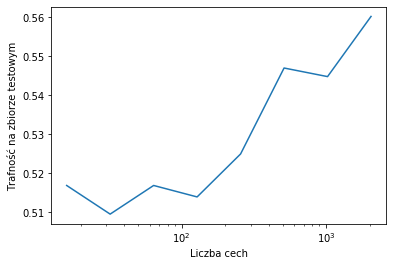

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

size = len(training_set.tweets)
train_size = int(size * 0.75)
train = training_set.tweets[0:train_size]
test = training_set.tweets[train_size+1:]

test_bow = bag_of_words(test)
test_classes = tweet_classes(test)

dims = 2**np.arange(4, 12)
accuracies = []
for d in dims:
    classifier = train_hashing_svm(train, d)
    predicted = classifier.predict(test_bow)
    score = accuracy_score(test_classes, predicted)
    accuracies.append(score)

plt.xscale('log')
plt.xlabel('Liczba cech')
plt.ylabel('Trafność na zbiorze testowym')
plt.plot(dims, accuracies)
plt.show()

 - Obserwując stworzony wykres - skomentuj. Jak dużo jakości klasyfikacji się traci (albo zyskuje?) korzystając z mniejszej liczby haszowanych cech? Często klasyfikatory bardzo dobrze działają nawet przy liczbie haszowanych cech dla których na pewno istnieją konflikty cech oryginalnych - jak myślisz dlaczego? (Pomyśl o interpretacji takich skonfliktowanych cech).

YOUR ANSWER HERE

 - W poprzednim zadaniu wczytałeś wynik grupowania Browna do pamięci. Wytrenuj klasyfikator na reprezentacji ,,Bag-of-clusters'' tj. w kolumnach zamiast słów/n-gramów będziesz miał grupy.

In [75]:
brown_dict = { row['word']: row['cluster'] for _, row in brown_df.iterrows() }
# ^damn slow

def bag_of_clusters(tweets):
    return [
        [brown_dict.get(token, 0) for token in tweet.tokens]
        for tweet in tweets
    ]

print(bag_of_clusters(training_set.tweets[0:10]))

[[111010101011111, 11101110, 110100, 0, 1011100, 1111010110110, 11001100, 11111001110, 100110111, 11011110, 10010, 11010000, 1111111110, 111101110011111, 111000010110, 10001101, 1110101010110, 1000100], [11101110, 11010110, 110111010, 1110100, 10110111110, 11000, 1111011110010, 11010100, 1000010, 1000, 10110010111, 110110, 1101100111, 111100110111100, 1000100, 1111111100, 11001100, 110100, 1111110101110, 1111001111110, 1111111100, 10011110, 1011111110, 100110111, 0, 11001010, 110110110, 11110100010, 10110, 1110110, 10001110], [110100111, 0, 10110111110, 11000, 111101110111110, 10011110, 11000, 0, 1111110001010, 11110111000110, 1000100, 1110111, 0, 111100110100, 101110, 111100011110, 1010, 10100111111, 100110111, 10110010110, 1110110, 10111111, 11100110110, 10001101, 11101110, 11101110], [111001100001, 10010, 0, 11101010, 1000, 100011011, 11011100, 11111100110110, 1111110010010, 10110, 11111100110110, 1000100, 11010000, 10010, 1110100, 100000, 10110111110, 11000, 1101100110, 11111011111

- Podsumuj eksperymenty: poznałeś dwie możliwości ograniczenia liczby cech - zastąpienie słów ich grupami i haszowanie cech. Jakie są wady i zalety obydwu podejść?

YOUR ANSWER HERE